In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mnso

In [75]:
df=pd.read_csv(r"C:\Users\DELL\OneDrive\Documents\Downloads\churn_dataset.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [76]:
df.shape

(7043, 21)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<AxesSubplot:>

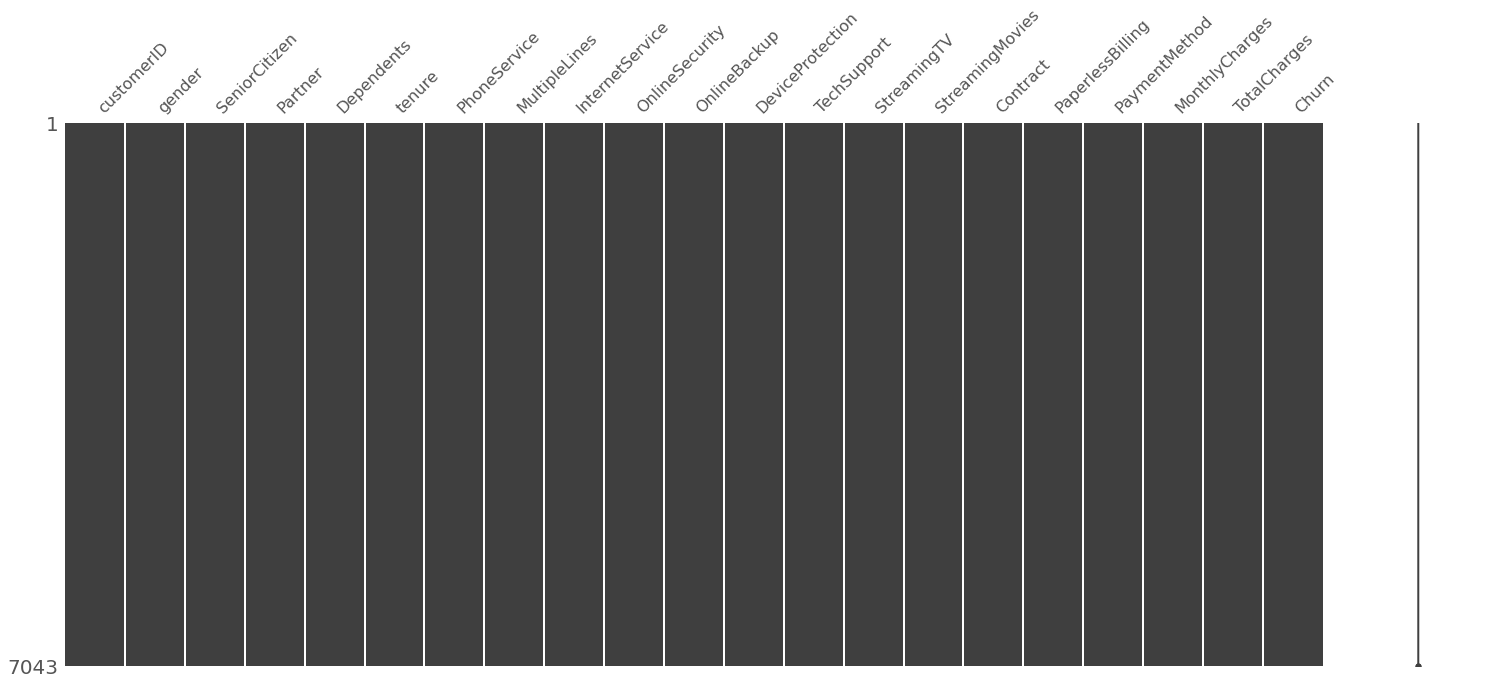

In [78]:
mnso.matrix(df)

In [79]:
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"],errors='coerce')

In [80]:
df=df.dropna()
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [81]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [82]:
df["Churn"].value_counts(normalize=True)

No     0.734215
Yes    0.265785
Name: Churn, dtype: float64

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'target variable')

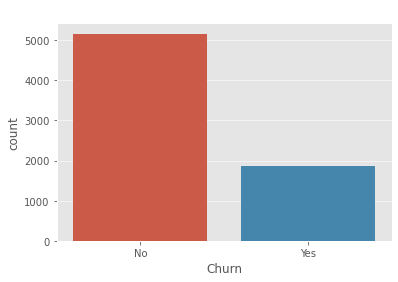

In [83]:
sns.countplot(df.Churn)
plt.title("target variable")

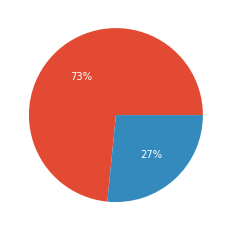

In [159]:
values=df['Churn'].value_counts()
labels=df['Churn'].unique().tolist()

plt.pie(df['Churn'].value_counts(),autopct='%.0f%%',labels=labels)
plt.show()

<AxesSubplot:xlabel='count', ylabel='PaymentMethod'>

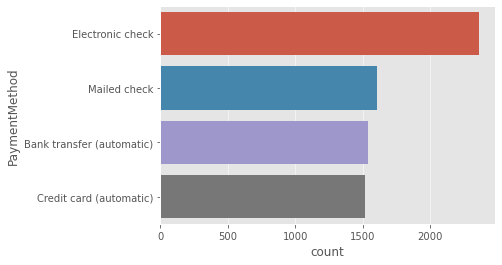

In [85]:
sns.countplot(data=df,y='PaymentMethod')

<AxesSubplot:xlabel='InternetService', ylabel='count'>

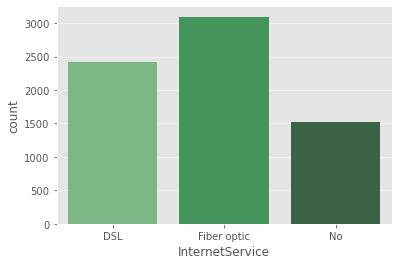

In [86]:
sns.countplot(x='InternetService',palette='Greens_d',data=df)

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

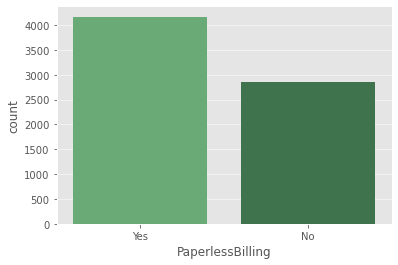

In [87]:
sns.countplot(x='PaperlessBilling',palette='Greens_d',data=df)

In [88]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


In [89]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


<AxesSubplot:>

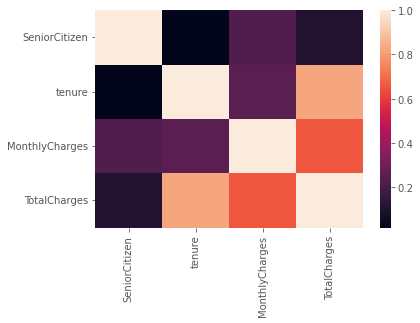

In [90]:
sns.heatmap(df.corr())

In [91]:
categorical= df.select_dtypes(include= ["object"])
categorical

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,2234-XADUH,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,4801-JZAZL,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,8361-LTMKD,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


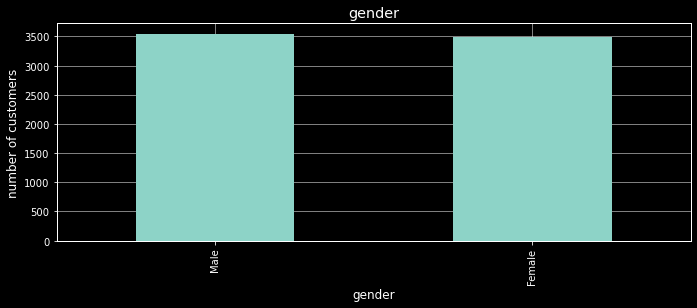

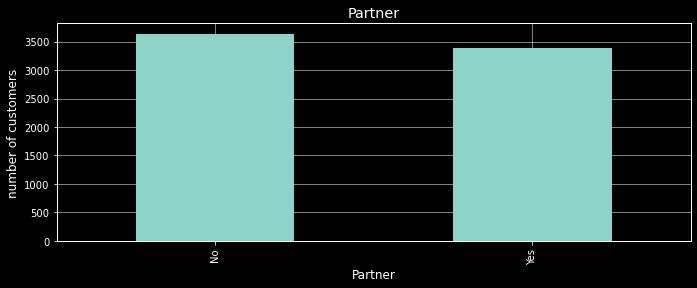

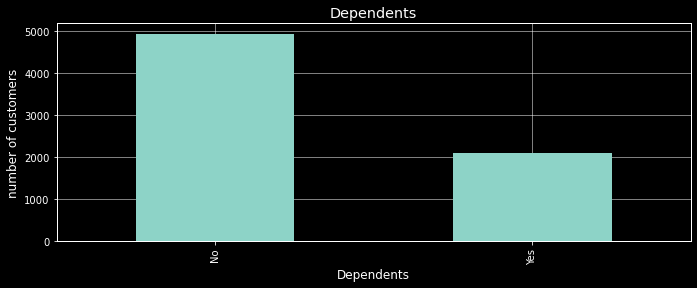

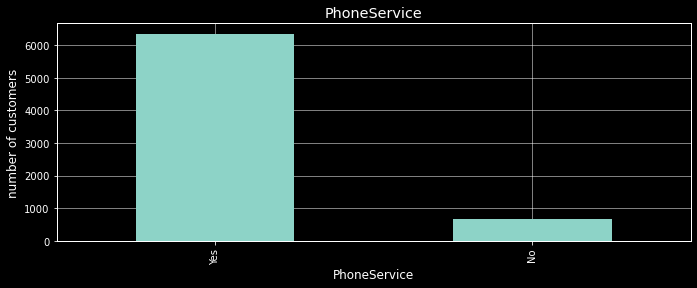

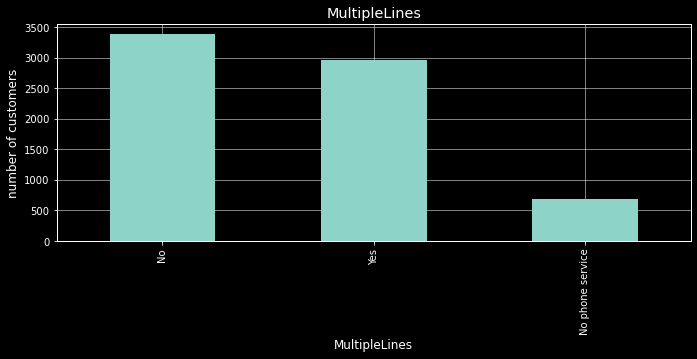

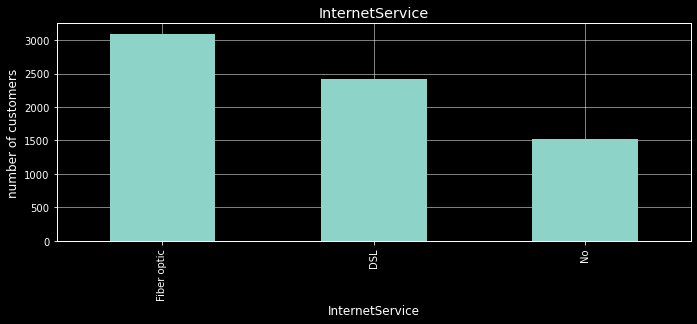

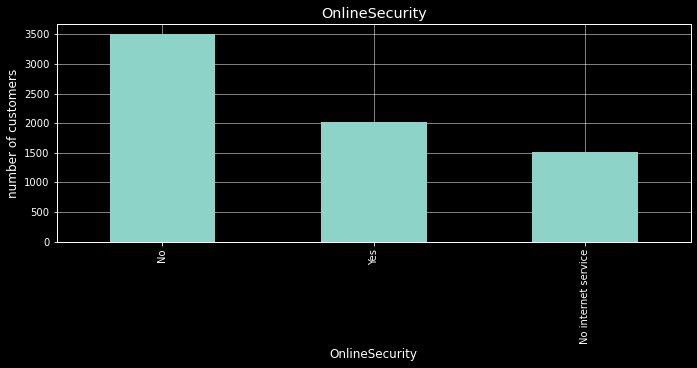

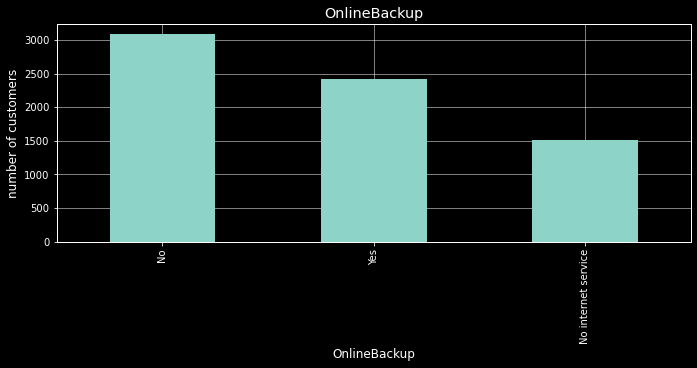

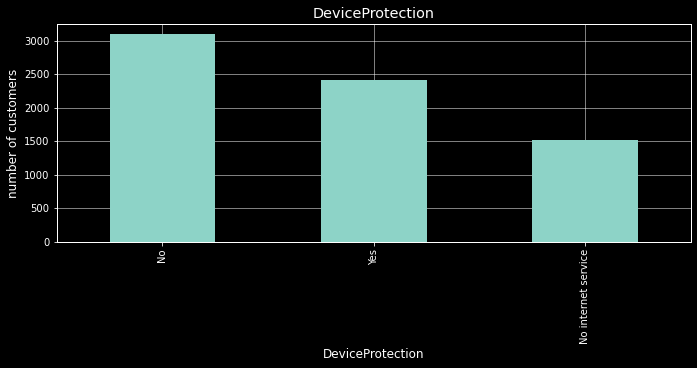

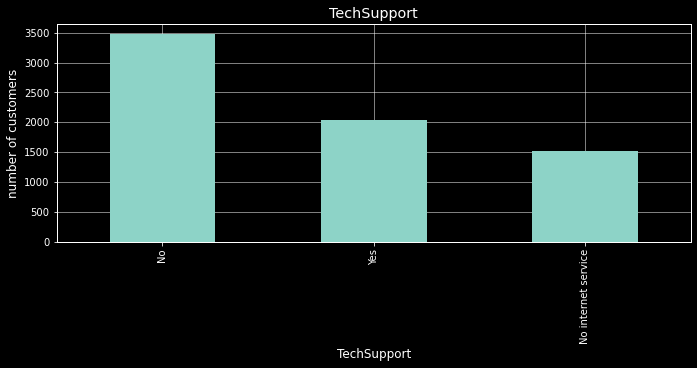

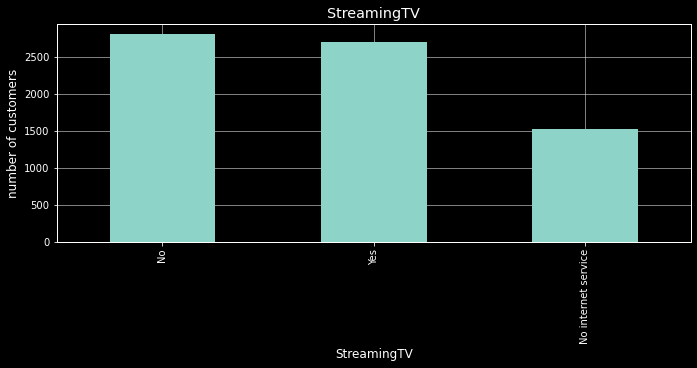

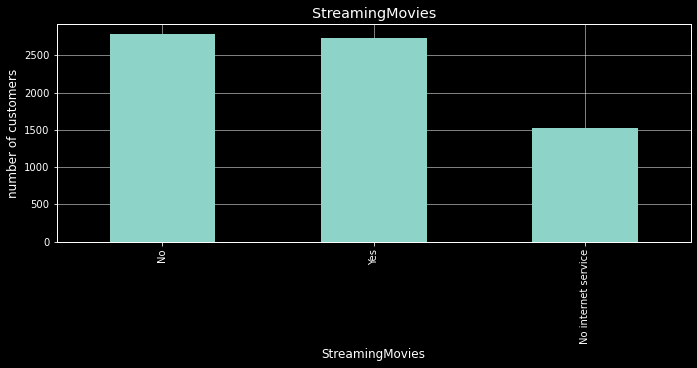

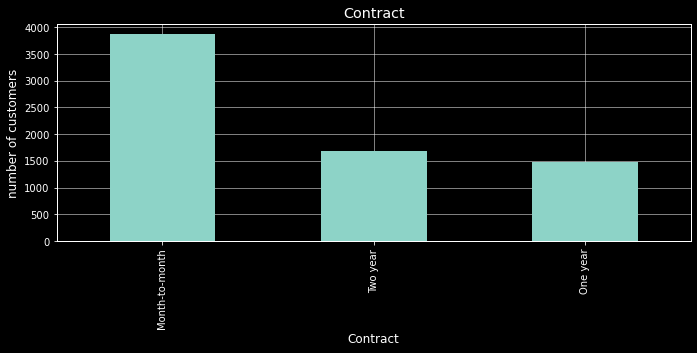

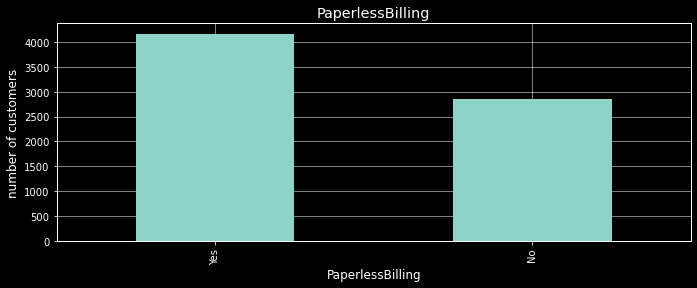

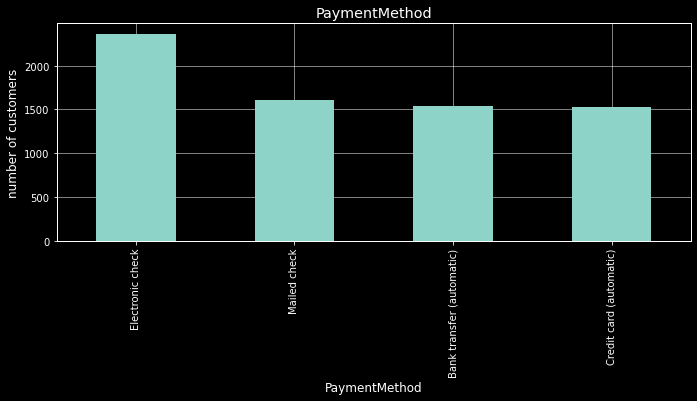

In [99]:
cat_var1= df.select_dtypes(include= ["object"]).columns
print(cat_var1)
plt.style.use("dark_background")

for column in cat_var1:
    if column =='customerID':
        continue
    elif column == 'Churn':
        continue
    plt.figure(figsize=(25,4))
    plt.subplot(121)
    df[column].value_counts().plot(kind="bar")
    plt.xlabel(column)
    plt.ylabel("number of customers")
    plt.title(column)

Observations :

● It seems like mostlty both the male and female are using communications , that too customers who are not having any partner are High.

● Independent people has highest  Phone Services and also No using Multiple lines.

● The highest Internet Servieces are Fiber Optic with out any Online Security , Online Backup ,Device Protection and Tech Support.And also for not Sreaming services..

● Majortiy of customers have Month-to-Month Contract,They are using PaperLess Billing.

● Most of the Payment methods are Electronic Check , I think they might have an intension of Save Paper 😊😊

In [93]:
df.describe().T.sort_values(ascending = 0,by = "mean").style.background_gradient(cmap = "BuGn")\
.bar(subset = ["std"], color ="red").bar(subset = ["mean"], color ="blue")

,count,mean,std,min,25%,50%,75%,max
TotalCharges,7032.000000,2283.300441,2266.771362,18.800000,401.450000,1397.475000,3794.737500,8684.800000
MonthlyCharges,7032.000000,64.798208,30.085974,18.250000,35.587500,70.350000,89.862500,118.750000
tenure,7032.000000,32.421786,24.545260,1.000000,9.000000,29.000000,55.000000,72.000000
SeniorCitizen,7032.000000,0.162400,0.368844,0.000000,0.000000,0.000000,0.000000,1.000000


In [102]:
payment_data =  df.groupby('PaymentMethod')[df.columns].mean().sort_values(by = "TotalCharges",ascending = False)
payment_data.style.background_gradient(cmap = "BuGn")

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
PaymentMethod,,,,
Bank transfer (automatic),0.151102,43.713359,67.205577,3079.299546
Credit card (automatic),0.145299,43.297830,66.519264,3071.396022
Electronic check,0.251163,25.174630,76.255814,2090.868182
Mailed check,0.058603,21.938903,43.958354,1054.483915


In [94]:
num= df.select_dtypes(include=np.number)
num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

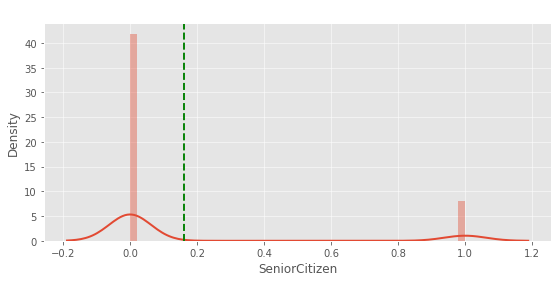

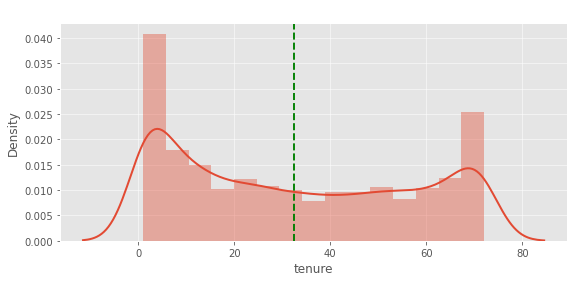

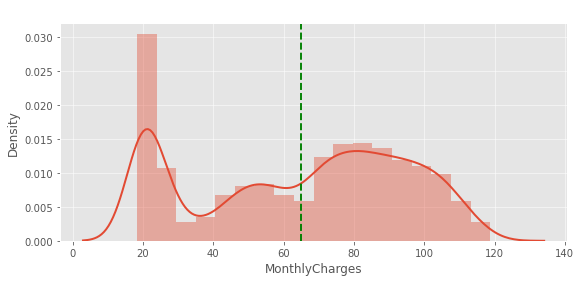

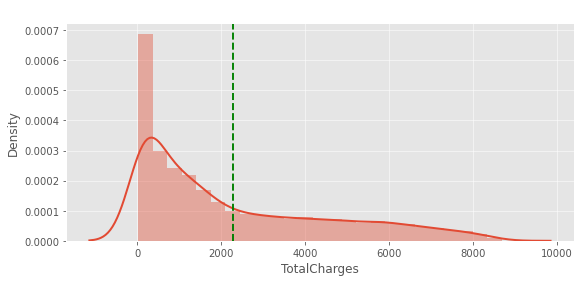

In [104]:
plt.style.use("ggplot")
for column in num:
    if column == 'loan_status':
        continue
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.distplot(df[column], kde=True)
    plt.axvline(x=df[column].mean(),
            color='green',ls='--', 
            lw=1.9)
    plt.title(column)

In [96]:
print("kurtosis of Numerical variables:",'\n')
print(num.kurtosis(),'\n\n')
print('Skewness of Numerical variables :','\n')
print(num.skew(),'\n\n')
print('Mean for Numerical variables:','\n')
print(num.mean(),'\n\n')

kurtosis of Numerical variables: 

SeniorCitizen     1.353321
tenure           -1.387823
MonthlyCharges   -1.256156
TotalCharges     -0.231799
dtype: float64 


Skewness of Numerical variables : 

SeniorCitizen     1.831103
tenure            0.237731
MonthlyCharges   -0.222103
TotalCharges      0.961642
dtype: float64 


Mean for Numerical variables: 

SeniorCitizen        0.162400
tenure              32.421786
MonthlyCharges      64.798208
TotalCharges      2283.300441
dtype: float64 




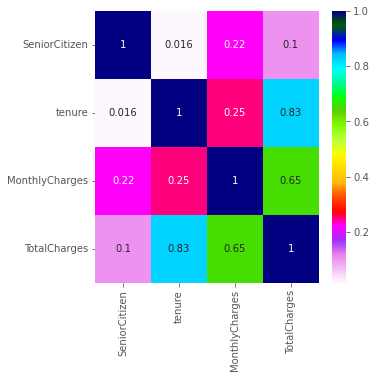

In [110]:
corrmat = num.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(5,5))
#plot heat map
g=sns.heatmap(num[top_corr_features].corr(),annot=True,cmap="gist_ncar_r")

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-p

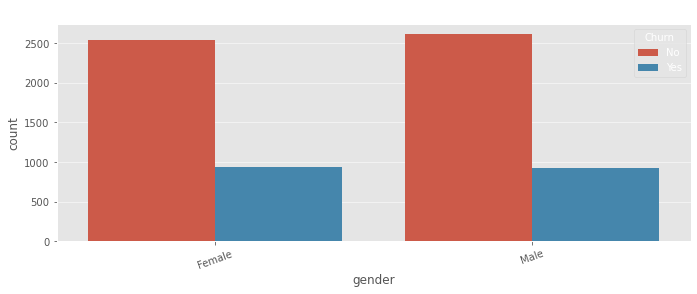

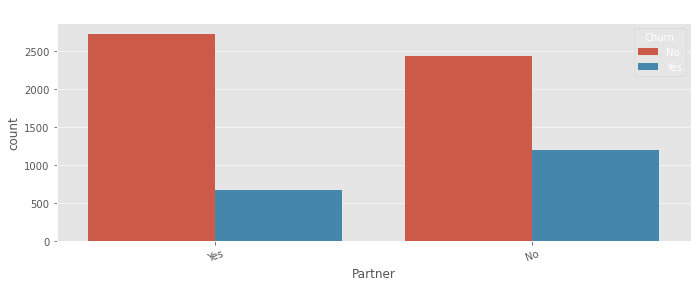

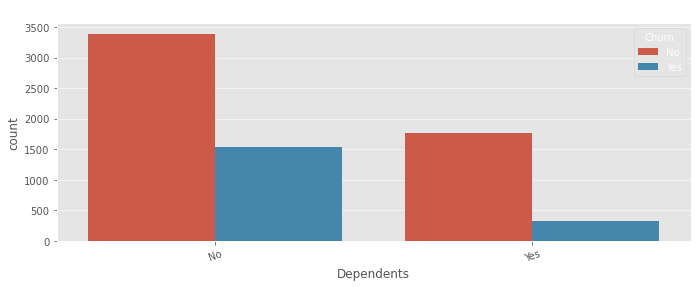

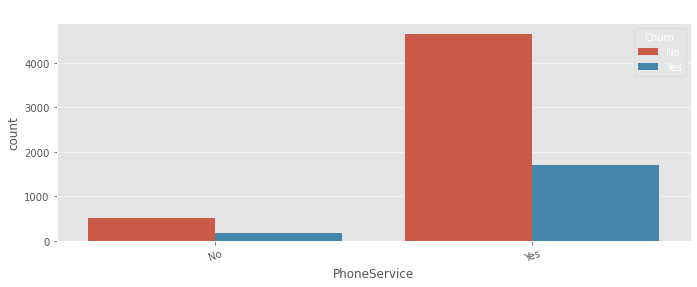

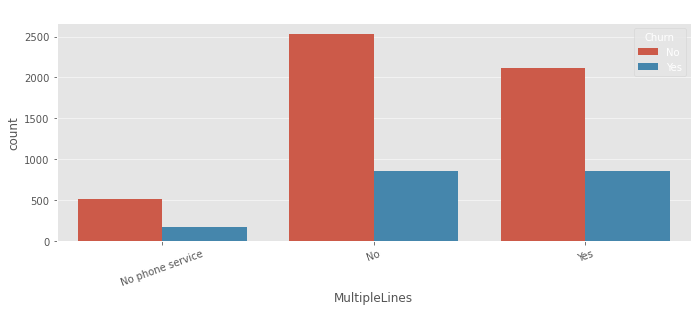

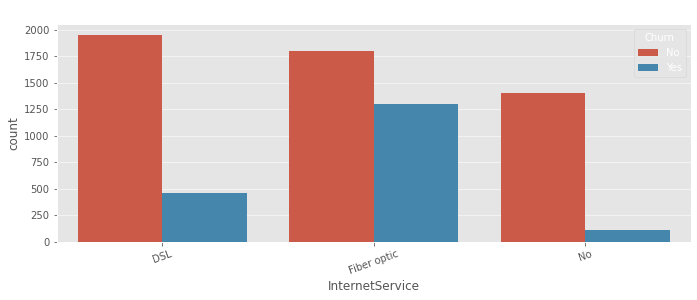

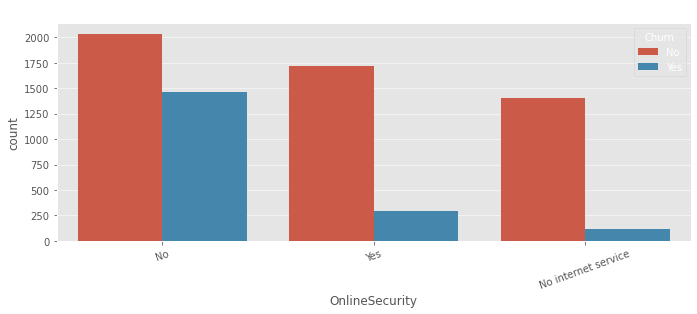

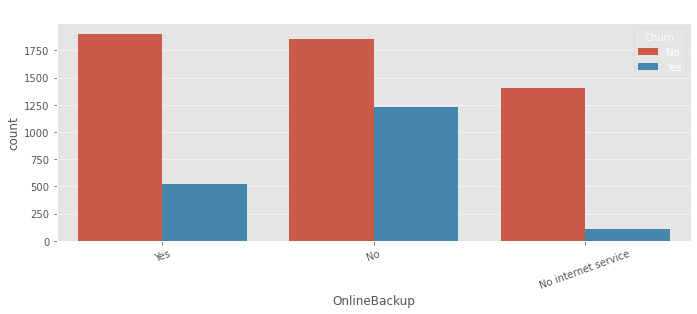

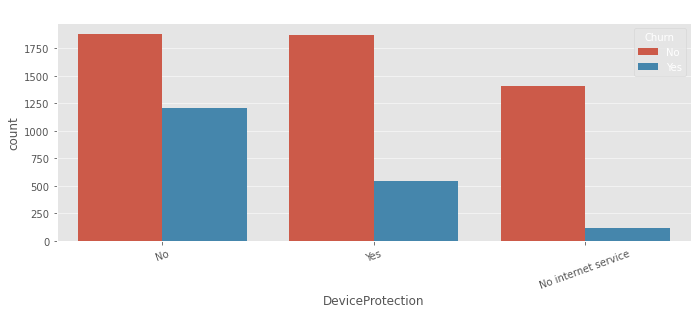

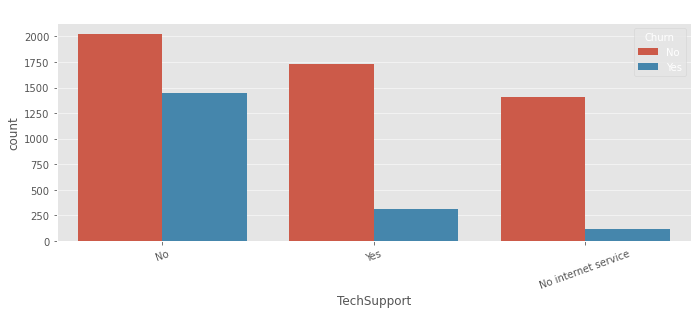

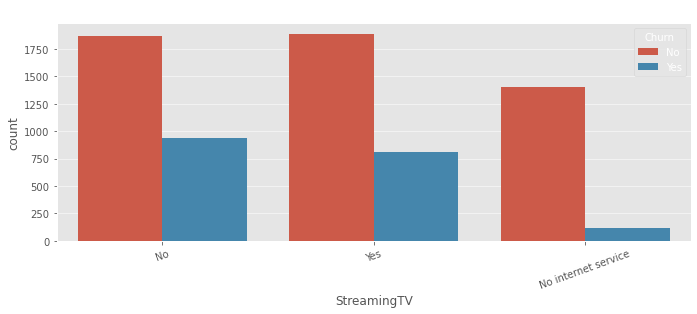

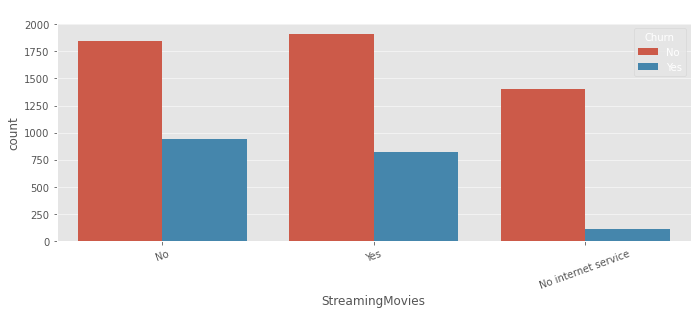

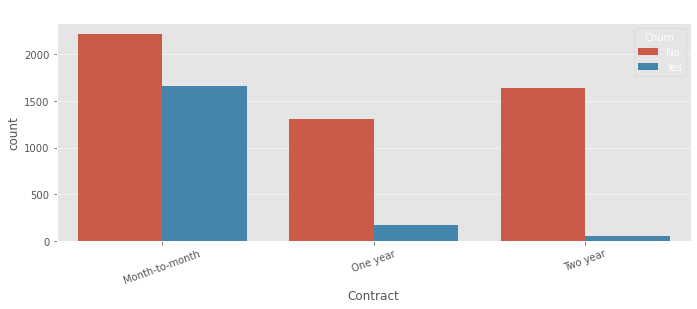

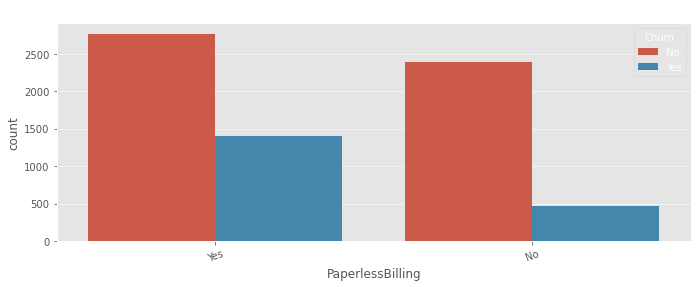

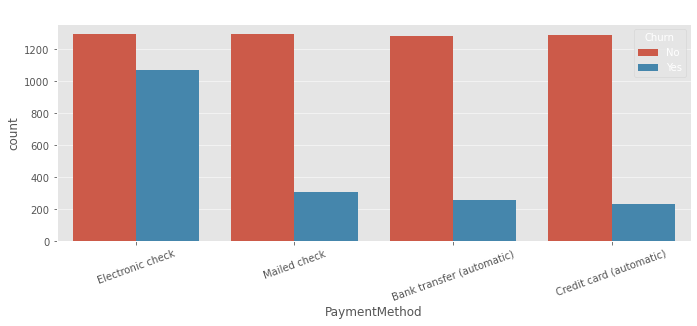

In [113]:
plt.style.use("ggplot")
for column in cat_var1:
    if column =='customerID':
        continue
    elif column == 'Churn':
        continue
    plt.figure(figsize=(25,4))
    plt.subplot(121)
    sns.countplot(df[column], hue=df["Churn"])
    plt.title(column)    
    plt.xticks(rotation=20)

## Model Building 

In [117]:
y = df['Churn']
X= df[['customerID','gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','SeniorCitizen','tenure','MonthlyCharges','TotalCharges']]

In [118]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [119]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(4922, 20) (4922,)
(2110, 20) (2110,)


In [120]:
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_cat.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
879,9342-VNIMQ,Male,No,No,Yes,Yes,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic)
5790,0980-PVMRC,Female,Yes,Yes,No,No phone service,DSL,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check
6498,0742-NXBGR,Female,No,No,Yes,No,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,Yes,Electronic check
880,9851-KIELU,Male,No,No,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check
2784,7295-JOMMD,Female,No,Yes,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic)


In [121]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

X_train_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
879,0,33,54.65,1665.20
5790,0,40,50.85,2036.55
6498,0,1,82.30,82.30
880,0,10,110.10,1043.30
2784,0,4,98.10,396.30


In [122]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_rescaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
879,-0.439559,0.019693,-0.338074,-0.276449
5790,-0.439559,0.305384,-0.464443,-0.112702
6498,-0.439559,-1.286319,0.581425,-0.974430
880,-0.439559,-0.919003,1.505913,-0.550676
2784,-0.439559,-1.163880,1.106854,-0.835971


In [123]:
del(X_train_cat["customerID"])
X_train_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
879,Male,No,No,Yes,Yes,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic)
5790,Female,Yes,Yes,No,No phone service,DSL,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check
6498,Female,No,No,Yes,No,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,Yes,Electronic check
880,Male,No,No,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check
2784,Female,No,Yes,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic)


In [124]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()


# iterating through each categorical feature and label encoding them
for feature in X_train_cat:
        X_train_cat[feature]= le.fit_transform(X_train_cat[feature])
        
X_train_cat

C:\Users\DELL\AppData\Local\Temp/ipykernel_12868/2674156924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cat[feature]= le.fit_transform(X_train_cat[feature])


,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
879,1,0,0,1,2,0,0,2,0,0,0,0,0,1,0
5790,0,1,1,0,1,0,0,2,0,0,2,2,0,1,2
6498,0,0,0,1,0,1,0,2,2,0,0,0,0,1,2
880,1,0,0,1,0,1,2,2,2,2,2,2,0,1,2
2784,0,0,1,1,0,1,0,0,2,2,2,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0,1,1,1,2,2,1,1,1,1,1,1,1,1,1
3934,0,0,1,0,1,0,2,2,0,2,0,0,1,0,3
5964,0,1,1,1,0,0,2,0,2,2,0,0,0,0,0
6947,1,1,1,1,2,1,0,2,0,0,2,2,1,1,1


In [125]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat], axis=1)

X_train_transformed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
879,-0.439559,0.019693,-0.338074,-0.276449,1,0,0,1,2,0,0,2,0,0,0,0,0,1,0
5790,-0.439559,0.305384,-0.464443,-0.112702,0,1,1,0,1,0,0,2,0,0,2,2,0,1,2
6498,-0.439559,-1.286319,0.581425,-0.974430,0,0,0,1,0,1,0,2,2,0,0,0,0,1,2
880,-0.439559,-0.919003,1.505913,-0.550676,1,0,0,1,0,1,2,2,2,2,2,2,0,1,2
2784,-0.439559,-1.163880,1.106854,-0.835971,0,0,1,1,0,1,0,0,2,2,2,2,0,1,0


## Test Data

In [126]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
942,0,24,79.85,2001.00
3730,0,57,104.50,5921.35
1761,0,58,24.45,1513.60
2283,0,1,71.55,71.55
1872,0,41,19.70,804.25
...,...,...,...,...
1289,0,63,68.80,4111.35
3508,0,70,113.65,7939.25
6765,0,69,25.60,1673.40
3598,1,1,46.30,46.30


In [127]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
942,-0.439559,-0.347623,0.499951,-0.128378
3730,-0.439559,0.999203,1.319685,1.600302
1761,-0.439559,1.040015,-1.342374,-0.343297
2283,-0.439559,-1.286319,0.223935,-0.979170
1872,-0.439559,0.346196,-1.500335,-0.656086
...,...,...,...,...
1289,-0.439559,1.244080,0.132483,0.802182
3508,-0.439559,1.529770,1.623968,2.490097
6765,-0.439559,1.488957,-1.304131,-0.272833
3598,2.275007,-1.286319,-0.615753,-0.990304


In [128]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
942,7567-ECMCM,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic)
3730,6771-XWBDM,Female,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic)
1761,5356-KZCKT,Male,No,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic)
2283,6140-QNRQQ,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check
1872,9938-PRCVK,Female,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1289,9968-FFVVH,Male,No,No,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
3508,2368-GAKKQ,Female,No,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic)
6765,5115-SQAAU,Female,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic)
3598,6185-TASNN,Male,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check


In [129]:
del(X_test_cat["customerID"])
X_test_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
942,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic)
3730,Female,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic)
1761,Male,No,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic)
2283,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check
1872,Female,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic)


In [130]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()


# iterating through each categorical feature and label encoding them
for feature in X_test_cat:
        X_test_cat[feature]= le.fit_transform(X_test_cat[feature])
        
X_test_cat

C:\Users\DELL\AppData\Local\Temp/ipykernel_12868/2696711100.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_cat[feature]= le.fit_transform(X_test_cat[feature])


,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
942,1,0,0,1,0,1,0,0,0,0,0,2,0,1,1
3730,0,1,0,1,2,1,0,2,2,0,2,2,0,1,1
1761,1,0,0,1,2,2,1,1,1,1,1,1,2,1,1
2283,1,0,0,1,0,1,0,0,0,0,0,0,0,1,3
1872,0,1,1,1,0,2,1,1,1,1,1,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1289,1,0,0,1,2,0,2,2,2,2,0,0,1,0,0
3508,0,0,0,1,2,1,2,2,2,2,2,2,2,1,0
6765,0,1,1,1,2,2,1,1,1,1,1,1,2,1,0
3598,1,0,0,1,0,0,0,0,0,0,0,0,0,0,2


In [131]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat], axis=1)

X_test_transformed

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
942,-0.439559,-0.347623,0.499951,-0.128378,1,0,0,1,0,1,0,0,0,0,0,2,0,1,1
3730,-0.439559,0.999203,1.319685,1.600302,0,1,0,1,2,1,0,2,2,0,2,2,0,1,1
1761,-0.439559,1.040015,-1.342374,-0.343297,1,0,0,1,2,2,1,1,1,1,1,1,2,1,1
2283,-0.439559,-1.286319,0.223935,-0.979170,1,0,0,1,0,1,0,0,0,0,0,0,0,1,3
1872,-0.439559,0.346196,-1.500335,-0.656086,0,1,1,1,0,2,1,1,1,1,1,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1289,-0.439559,1.244080,0.132483,0.802182,1,0,0,1,2,0,2,2,2,2,0,0,1,0,0
3508,-0.439559,1.529770,1.623968,2.490097,0,0,0,1,2,1,2,2,2,2,2,2,2,1,0
6765,-0.439559,1.488957,-1.304131,-0.272833,0,1,1,1,2,2,1,1,1,1,1,1,2,1,0
3598,2.275007,-1.286319,-0.615753,-0.990304,1,0,0,1,0,0,0,0,0,0,0,0,0,0,2


## LogisticRegression

In [133]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train_transformed, y_train)

LogisticRegression()

In [134]:
y_test_pred = regressor.predict(X_test_transformed)

In [135]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
942,No,No
3730,Yes,No
1761,No,No
2283,Yes,No
1872,No,No


In [136]:
from sklearn.metrics import accuracy_score
print('accuracy_score :',accuracy_score(y_test, y_test_pred))
lr_acc=accuracy_score(y_test, y_test_pred)

accuracy_score : 0.7421800947867299


## KNN Classifier

In [132]:
from sklearn.neighbors import KNeighborsClassifier
regressor = KNeighborsClassifier()
regressor.fit(X_train_transformed, y_train)

KNeighborsClassifier()

In [138]:
y_test_pred = regressor.predict(X_test_transformed)
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
942,No,No
3730,Yes,No
1761,No,No
2283,Yes,No
1872,No,No


In [140]:
from sklearn.metrics import accuracy_score
print('accuracy_score :',accuracy_score(y_test, y_test_pred))
kn_acc=accuracy_score(y_test, y_test_pred)

accuracy_score : 0.7421800947867299


## Supprt Vector classifier

In [141]:
from sklearn.svm import SVC
classifier=SVC()
classifier.fit(X_train_transformed, y_train)

SVC()

In [143]:
y_test_pred = classifier.predict(X_test_transformed)
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
942,No,No
3730,Yes,No
1761,No,No
2283,Yes,Yes
1872,No,No


In [144]:
from sklearn.metrics import accuracy_score
print('accuracy_score :',accuracy_score(y_test, y_test_pred))
svc_acc=accuracy_score(y_test, y_test_pred)

accuracy_score : 0.7919431279620853


## Decision Tree  Classifier

In [145]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier.fit(X_train_transformed, y_train)

DecisionTreeClassifier()

In [146]:
y_test_pred = classifier.predict(X_test_transformed)
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
942,No,Yes
3730,Yes,Yes
1761,No,No
2283,Yes,Yes
1872,No,No


In [147]:
from sklearn.metrics import accuracy_score
print('accuracy_score :',accuracy_score(y_test, y_test_pred))
dt_acc=accuracy_score(y_test, y_test_pred)

accuracy_score : 0.7118483412322275


## Random Forest Classifier

In [148]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_transformed, y_train)

RandomForestClassifier()

In [149]:
y_test_pred = classifier.predict(X_test_transformed)

In [150]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
942,No,No
3730,Yes,No
1761,No,No
2283,Yes,Yes
1872,No,No


In [151]:
from sklearn.metrics import accuracy_score
print('accuracy_score :',accuracy_score(y_test, y_test_pred))
rf_acc=accuracy_score(y_test, y_test_pred)

accuracy_score : 0.7819905213270142


## Line plot  by  using All Lgorithms 

In [152]:
accuracy=pd.DataFrame([kn_acc,lr_acc,svc_acc,dt_acc,rf_acc],index=['Kneighours_classifier','Logistic_regression','SupportVector_classifier','DecisioTree_classifier','RandomForest_classifier'],columns=['Accuracy'])
accuracy.sort_values(by='Accuracy',ascending=False,inplace=True)
accuracy

,Accuracy
SupportVector_classifier,0.791943
RandomForest_classifier,0.781991
Kneighours_classifier,0.742180
Logistic_regression,0.742180
DecisioTree_classifier,0.711848


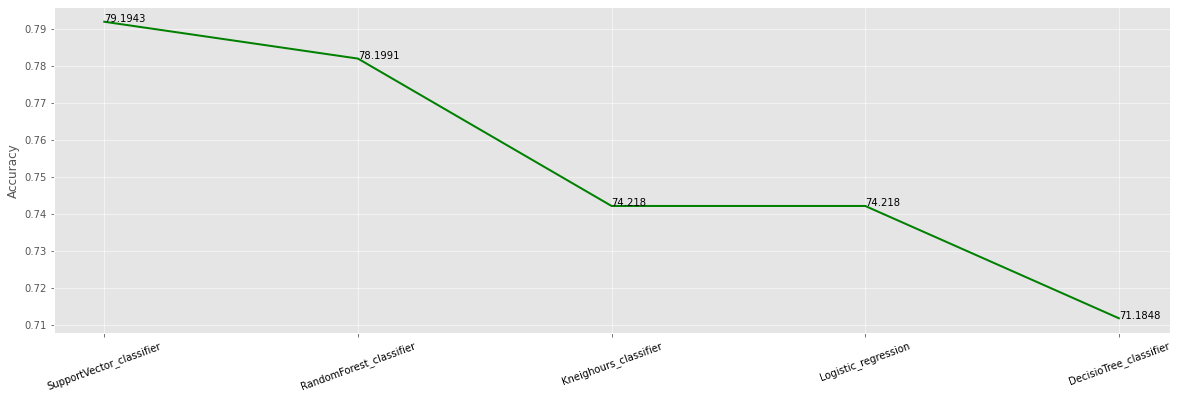

In [158]:
plt.figure(figsize=(20,6))
ax=sns.lineplot(x=accuracy.index,y='Accuracy',data=accuracy,color="green")
plt.xticks(rotation=20,color='black')
for i , acc in enumerate(accuracy['Accuracy']):
    plt.annotate(round(acc*100,4),(accuracy.index[i],accuracy['Accuracy'][i]),color='black')

plt.show()